Question 1: Denoising Images with Autoencoders
Dataset Problem: Use the CIFAR-10 dataset to train an autoencoder for denoising images. Add random noise to the CIFAR-10 dataset images and then use the autoencoder to clean the images.
CIFAR is an acronym that stands for the Canadian Institute for Advanced Research and the
CIFAR-10 dataset was developed along with the CIFAR-100 dataset by researchers at the CIFAR institute. The dataset is comprised of 60,000 32 X 32-pixel color photographs of objects from10 classes, such as frogs, birds, cats, ships, etc. The class labels and their standard associated
integer values are listed below.

0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck

Download the data from: http://www.cs.utoronto.ca/~kriz/cifar.html


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input
from tensorflow.keras.optimizers import Adam

# 1. Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


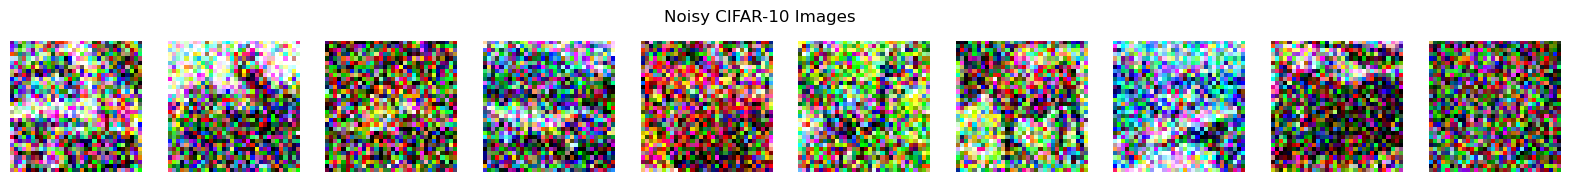

In [2]:
# Normalize images to [0, 1] range
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Add random noise to the images
noise_factor = 0.4
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape) 
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape) 

# Clip values to keep them in the [0, 1] range
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# Display a few noisy images to understand the noise level
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(X_train_noisy[i])
    plt.axis("off")
plt.suptitle("Noisy CIFAR-10 Images")
plt.show()


In [3]:
import pandas as pd
pd.DataFrame(y_train).value_counts()

0    5000
1    5000
2    5000
3    5000
4    5000
5    5000
6    5000
7    5000
8    5000
9    5000
dtype: int64

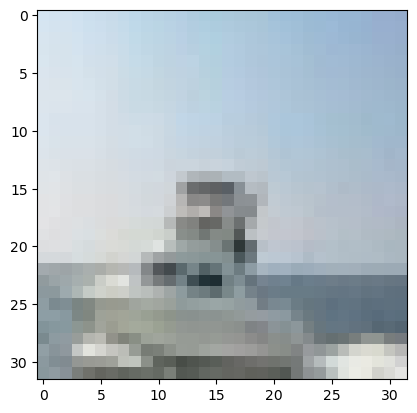

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[100])
plt.show()

In [5]:
# Input layer
input_img = Input(shape=(32, 32, 3))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
output_img = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder model
autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [6]:
# Train the model
autoencoder.fit(X_train_noisy, X_train, epochs=20, batch_size=128, shuffle=True, validation_data=(X_test_noisy, X_test))


Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 66ms/step - loss: 0.6072 - val_loss: 0.5805
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 64ms/step - loss: 0.5781 - val_loss: 0.5763
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 63ms/step - loss: 0.5748 - val_loss: 0.5748
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 63ms/step - loss: 0.5738 - val_loss: 0.5738
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 64ms/step - loss: 0.5731 - val_loss: 0.5735
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step - loss: 0.5719 - val_loss: 0.5729
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step - loss: 0.5716 - val_loss: 0.5726
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 65ms/step - loss: 0.5717 - val_loss: 0.5731
Epoch 9/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 65ms/step - loss: 0.5722 - val_loss: 0.5723
Epoch 10/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step - loss: 0.5712 - val_loss: 0.5728
Epoch 11/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 27s 69ms/step - loss: 0.5715 - val_loss: 0.5720
Epoch 12/20
391/391 ━━━━━━━━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


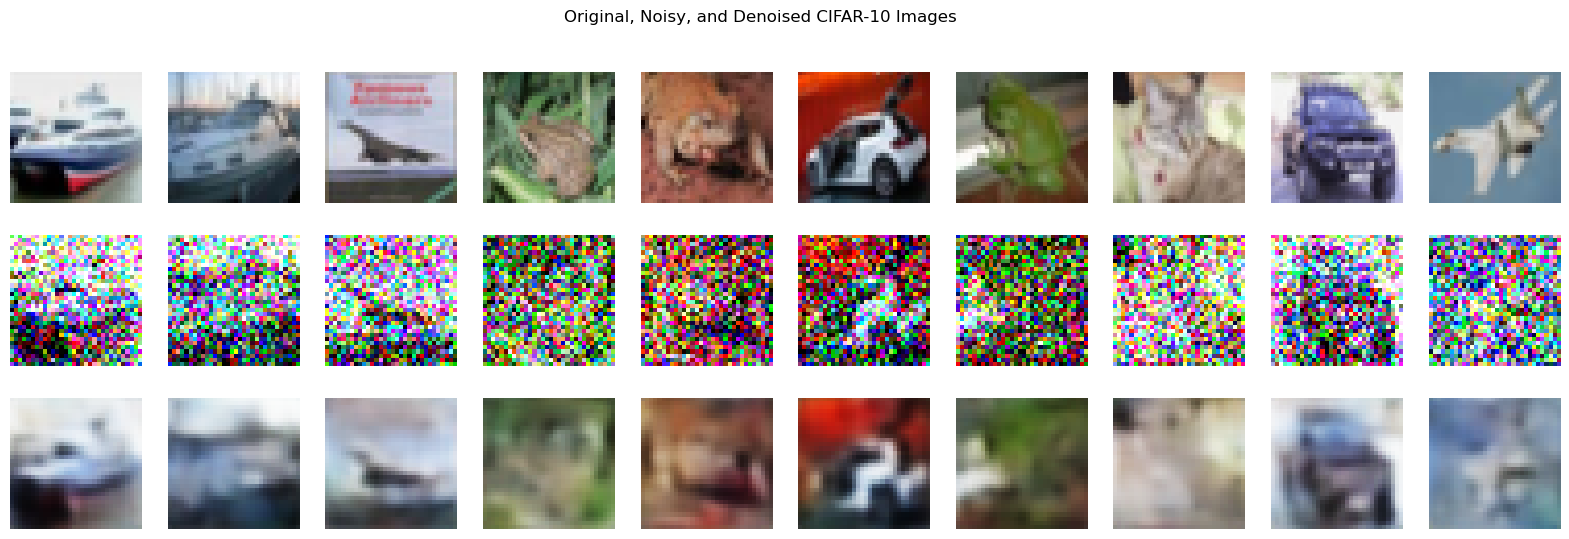

In [7]:
# Use the autoencoder to predict on the noisy test images
decoded_imgs = autoencoder.predict(X_test_noisy)

# Display a few original, noisy, and denoised images
n = 10  # number of images to display
plt.figure(figsize=(20, 6))
for i in range(1, n + 1):
    # Original images
    ax = plt.subplot(3, n, i)
    plt.imshow(X_test[i])
    plt.axis("off")

    # Noisy images
    ax = plt.subplot(3, n, i + n)
    plt.imshow(X_test_noisy[i])
    plt.axis("off")

    # Denoised images
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded_imgs[i])
    plt.axis("off")

plt.suptitle("Original, Noisy, and Denoised CIFAR-10 Images")
plt.show()


#####  Noise Addition: By adding random noise to the CIFAR-10 dataset, we created a noisy version of the dataset.
#####  Autoencoder Model: The autoencoder was trained to learn how to map noisy images to their clean versions.
#####  Denoising Performance: The denoised images should look much closer to the original images than the noisy versions, showing the denoising effect of the autoencoder.
#####  Notes
#####  Optimization: You can adjust the noise factor, autoencoder architecture, or other hyperparameters (e.g., number of epochs) to improve results.
#####  Advanced Improvements: Adding more layers or using residual connections can improve denoising, especially for more complex noise patterns.

Question 2: CIFAR-10 dataset reconstruction
Dataset Problem: Use the CIFAR-10 dataset to train an autoencoder. The goal is to input an image of a CIFAR-10 dataset into the autoencoder and have it reconstruct the image as a new output. Use the concept of VAE to solve this problem
CIFAR is an acronym that stands for the Canadian Institute for Advanced Research and the
CIFAR-10 dataset was developed along with the CIFAR-100 dataset by researchers at the CIFAR institute. The dataset is comprised of 60,000 32 X 32-pixel color photographs of objects from10 classes, such as frogs, birds, cats, ships, etc. The class labels and their standard associated
integer values are listed below.

0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Download the data from: http://www.cs.utoronto.ca/~kriz/cifar.html


In [36]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load CIFAR-10 dataset from TensorFlow/Keras dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the pixel values to [0, 1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

# Optionally, split training data into training and validation sets
x_train, x_val = train_test_split(x_train, test_size=0.1, random_state=42)


##### 2. Define VAE Model Components
#####  Encoder: This part of the model takes an image and encodes it into a latent space (mean and log variance vectors). The encoder will consist of convolutional layers followed by a dense layer that outputs the parameters of the Gaussian distribution in the latent space.

##### Reparameterization Trick: Since we want to sample from a distribution during training, we use the reparameterization trick, which allows gradients to flow through the latent variable.

##### Decoder: This part of the model takes a sample from the latent space and reconstructs the original image from this representation.

In [37]:
# Encoder Network
class Encoder(tf.keras.layers.Layer):
    def __init__(self, latent_dim):
        super(Encoder, self).__init__()
        self.conv1 = layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')
        self.conv2 = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')
        self.flatten = layers.Flatten()
        self.dense_mean = layers.Dense(latent_dim)
        self.dense_log_var = layers.Dense(latent_dim)
    
    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.conv2(x)
        x = self.flatten(x)
        mean = self.dense_mean(x)
        log_var = self.dense_log_var(x)
        return mean, log_var

# Decoder Network
class Decoder(tf.keras.layers.Layer):
    def __init__(self, latent_dim):
        super(Decoder, self).__init__()
        self.dense1 = layers.Dense(8 * 8 * 64, activation='relu')
        self.reshape = layers.Reshape((8, 8, 64))
        self.conv1 = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')
        self.conv2 = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')
        self.conv3 = layers.Conv2DTranspose(3, 3, activation='sigmoid', padding='same')  # Output image
    
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.reshape(x)
        x = self.conv1(x)
        x = self.conv2(x)
        reconstructed = self.conv3(x)
        return reconstructed

# Sampling layer using reparameterization trick
class Sampling(layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        batch = tf.shape(mean)[0]
        dim = tf.shape(mean)[1]
        epsilon = tf.random.normal(shape=(batch, dim))
        return mean + tf.exp(0.5 * log_var) * epsilon

# VAE model
class VAE(tf.keras.Model):
    def __init__(self, latent_dim):
        super(VAE, self).__init__()
        self.encoder = Encoder(latent_dim)
        self.sampler = Sampling()
        self.decoder = Decoder(latent_dim)
    
    def call(self, inputs):
        mean, log_var = self.encoder(inputs)
        z = self.sampler((mean, log_var))
        reconstructed = self.decoder(z)
        return reconstructed, mean, log_var


##### 3. Define Loss Function
##### For VAE, the loss consists of two parts:
##### Reconstruction Loss: The difference between the original image and the reconstructed image (typically binary cross-entropy or mean squared error).
##### KL Divergence Loss: A regularizer that ensures the distribution of the latent variables approximates a standard normal distribution.

In [38]:
def compute_loss(x, reconstructed, mean, log_var):
    reconstruction_loss = tf.reduce_mean(tf.keras.losses.binary_crossentropy(x, reconstructed))
    kl_loss = -0.5 * tf.reduce_mean(1 + log_var - tf.square(mean) - tf.exp(log_var))
    total_loss = reconstruction_loss + kl_loss
    return total_loss

In [39]:
# 4. Train the VAE Model
# Define the optimizer
optimizer = tf.keras.optimizers.Adam()

# Training step
@tf.function
def train_step(model, x_batch):
    with tf.GradientTape() as tape:
        reconstructed, mean, log_var = model(x_batch)
        loss = compute_loss(x_batch, reconstructed, mean, log_var)
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    return loss

# Training loop
latent_dim = 64  # Latent space dimension
vae = VAE(latent_dim)

epochs = 10
batch_size = 128
for epoch in range(epochs):
    for i in range(0, len(x_train), batch_size):
        x_batch = x_train[i:i + batch_size]
        x_batch = tf.convert_to_tensor(x_batch, dtype=tf.float32)
        loss = train_step(vae, x_batch)
    
    print(f"Epoch {epoch + 1}, Loss: {loss.numpy()}")


Epoch 1, Loss: 0.6754483580589294
Epoch 2, Loss: 0.6792111992835999
Epoch 3, Loss: 0.6725080609321594
Epoch 4, Loss: 0.6765370965003967
Epoch 5, Loss: 0.6727660894393921
Epoch 6, Loss: 0.6743910312652588
Epoch 7, Loss: 0.6746183633804321
Epoch 8, Loss: 0.6731065511703491
Epoch 9, Loss: 0.6751000285148621
Epoch 10, Loss: 0.6764180660247803


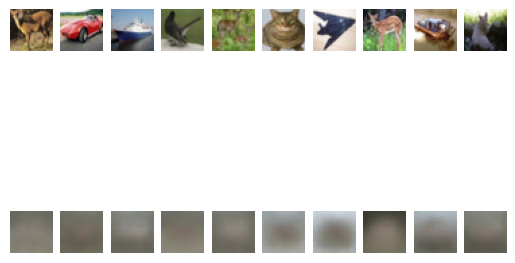

In [40]:
# 5. Visualize the Results
# Visualize a few original and reconstructed images
num_images = 10
indices = np.random.choice(len(x_test), num_images)
test_images = x_test[indices]

reconstructed_images, _, _ = vae(tf.convert_to_tensor(test_images, dtype=tf.float32))

# Plot original vs reconstructed images
for i in range(num_images):
    plt.subplot(2, num_images, i + 1)
    plt.imshow(test_images[i])
    plt.axis('off')
    
    plt.subplot(2, num_images, i + num_images + 1)
    plt.imshow(reconstructed_images[i])
    plt.axis('off')

plt.show()


##### Variational Autoencoder on the CIFAR-10 dataset to reconstruct images. This model can generate new images by sampling from the latent space and also improve its ability to recreate the input images.